### Veri okuma

In [1]:
import pandas as pd

veri=pd.read_csv("temizyorumlar.csv")

### Boş değer kontrol

In [2]:
if veri.isnull().sum().sum()>0:
    veri.dropna(axis=0,inplace=True)
print(veri.isnull().sum())

Firma Adı         0
İl                0
Yorumlar          0
Temiz Yorum       0
Tokenize Yorum    0
dtype: int64


### Temel firmalar ile kelime bulutu oluşturma

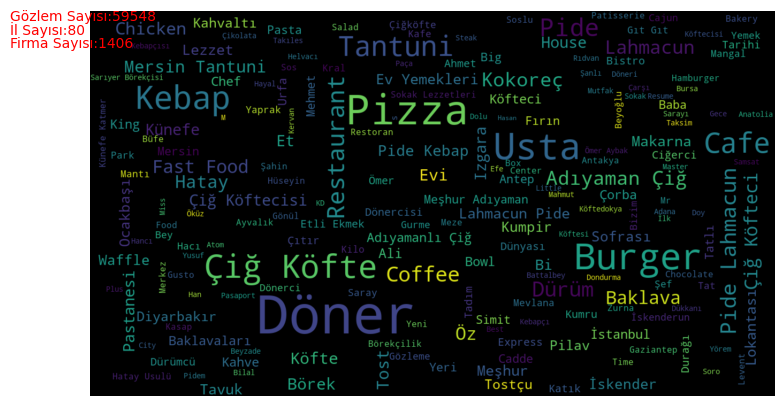

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

firmalar=veri["Firma Adı"].unique()
wc=WordCloud(width=1280,height=720,max_words=200,max_font_size=100).generate(" ".join(firmalar))

plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")

plt.text(-150,10,f"Gözlem Sayısı:{len(veri)}",fontsize=10,ha="left",va="center",color="red")
plt.text(-150,35,f"İl Sayısı:{len(veri["İl"].unique())}",fontsize=10,ha="left",va="center",color="red")
plt.text(-150,60,f"Firma Sayısı:{len(firmalar)}",fontsize=10,ha="left",va="center",color="red")
plt.show()

### Yorum sayısı ilk %95 dilimi oluşturan firmalar ve tüm illere göre yorum sayısı

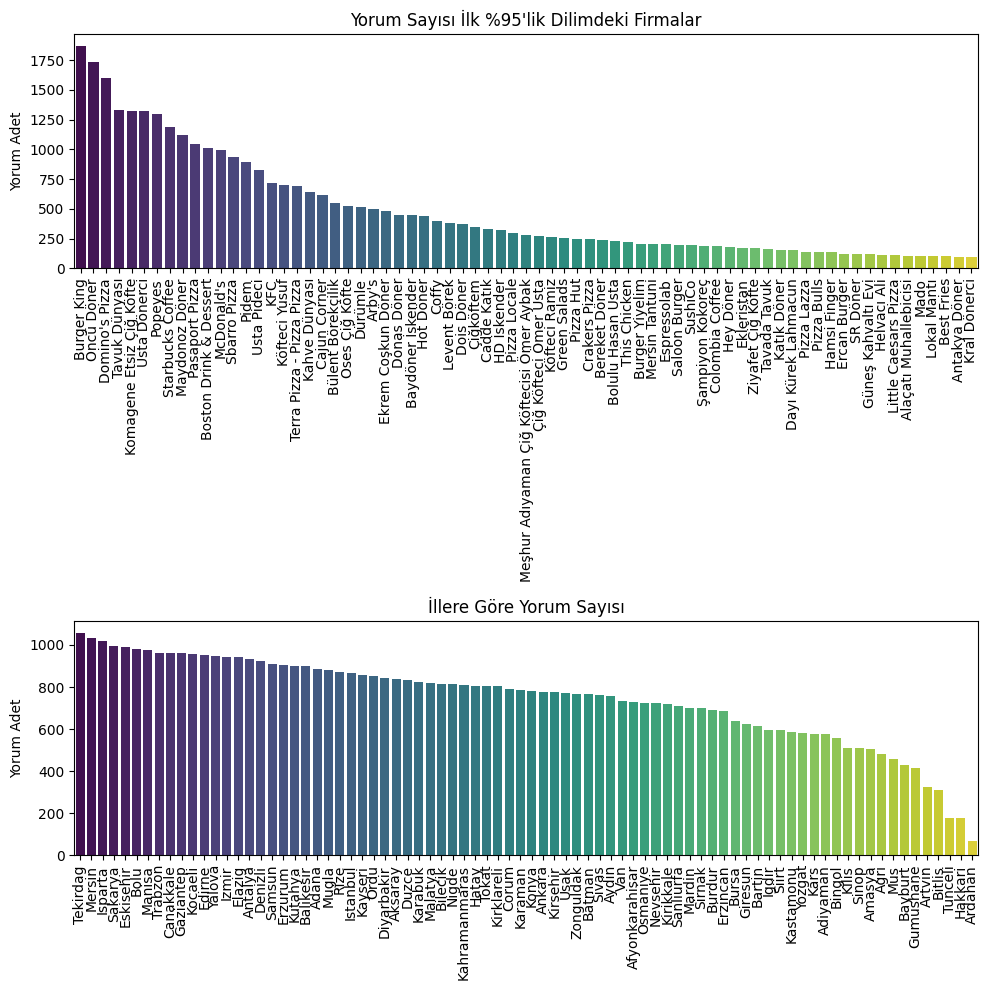

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

yorumsay=veri["Firma Adı"].value_counts().reset_index()
yorumsay.columns=["Firma Adı","Adet"]
ilsay=veri["İl"].value_counts().reset_index()
ilsay.columns=["İl","Adet"]

sınıryorum=yorumsay["Adet"].quantile(0.95)
dilimyorum=yorumsay[yorumsay["Adet"]>=sınıryorum]

fig,axs=plt.subplots(2,1,figsize=(10,10))

sns.barplot(x="Firma Adı",y="Adet",data=dilimyorum,palette="viridis",hue="Firma Adı",ax=axs[0])
axs[0].set_title('Yorum Sayısı İlk %95\'lik Dilimdeki Firmalar')
axs[0].set_ylabel("Yorum Adet")
axs[0].set_xlabel("")
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=90)

sns.barplot(x="İl",y="Adet",data=ilsay,palette="viridis",hue="İl",ax=axs[1])
axs[1].set_title("İllere Göre Yorum Sayısı")
axs[1].set_ylabel("Yorum Adet")
axs[1].set_xlabel("")
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()

### Bert modeli ile Sentiment Analizi

In [5]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer,pipeline

model=AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer=AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa=pipeline("sentiment-analysis",tokenizer=tokenizer,model=model)

def duygu(metin):
    return sa(metin)[0].get("label")

veri.dropna(axis=0,inplace=True)
veri["Duygu"]=veri["Temiz Yorum"].apply(duygu)
veri.to_csv("duygu.csv",index=False,encoding="utf-8")
